## AutoScout Car Price Prediction Capstone Project

AutoScout Car Price Prediction is my capstone project in data analysis and data visualization that aims to predict car prices based on various features. The project uses data scraped from an online car trading company's website in 2022, containing information about 13 different car makes and 594 models. 

The project is divided into three main parts: data cleaning, data imputation, and handling outliers using visualization libraries. The first part involves cleaning the data by dealing with incorrect headers, formats, anomalies, and dropping useless columns. The second part focuses on filling in missing values and converting categorical data to numeric data through encoding. Finally, in the third part, outliers in the data are identified and handled through the use of visualization libraries, allowing for valuable insights to be extracted.

The project utilizes a variety of commonly used algorithms in data cleaning and exploratory data analysis, including Python libraries such as Numpy, Pandas, Matplotlib, Seaborn, and Scipy. With a clean dataset in hand, the project then moves on to predictive modeling using machine learning techniques.

Overall, AutoScout Car Price Prediction is an innovative project that demonstrates the power of data analysis and visualization in making predictions and gaining insights. It has practical applications for the automotive industry and showcases the importance of data-driven decision making.

### Part-2 Handling With Missing Values

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_json('C:/Users/ihsankoo/Desktop/Clarusway/Data Science/Car price prediction capstone project/cleaned_data_autoscout.json')

In [3]:
df0 = df.copy()

In [4]:
df.full_service_history = df.full_service_history.fillna('No')

In [5]:
df.sample(3)

,make_model,make,model,location,price,body_type,type,doors,country_version,offer_number,...,upholstery,production_date,previous_owner,energy_efficiency_class,co2_efficiency,hp,age,other_fuel_types,fuel,short_description
11826,Fiat 500L,Fiat,500L,"Via Nazionale Per Donnas, 69, 11026 Pont Sain...",21900,Seda,Used,5,Unknown,17804457,...,nan,NaN,nan,nan,nan,95.0,1.0,None,Diesel,1.3 mjt 95cv Connect
19111,Toyota Prius,Toyota,Prius,"Halskestraße 1, 72766 Reutlingen, DE",29990,Seda,Used,5,Germany,102211578,...,Cloth,2019.0,"'37,000 km', '06/2019', '1'",A+,Calculated on basis of measured CO₂-emissions ...,98.0,3.0,Electricity,nan,Plug-in Hybrid Comfort
6985,Renault Laguna,Renault,Laguna,"Av. Reial Monestir Santa Maria de Poblet, 42.,...",9850,Seda,Used,5,Spain,7361088,...,nan,NaN,nan,nan,nan,110.0,7.0,None,Diesel,BOSE Edition


In [6]:
df.power.isna().value_counts()

False    28630
Name: power, dtype: int64

In [7]:
def show_nulls(data):
    plt.figure(figsize=(10, 5))

    sns.displot(data=data.isnull().melt(value_name="missing"),
                y="variable",
                hue="missing",
                multiple="fill",
                height=9.25)

    plt.axvline(0.2, color="r")
    plt.show()

<Figure size 720x360 with 0 Axes>

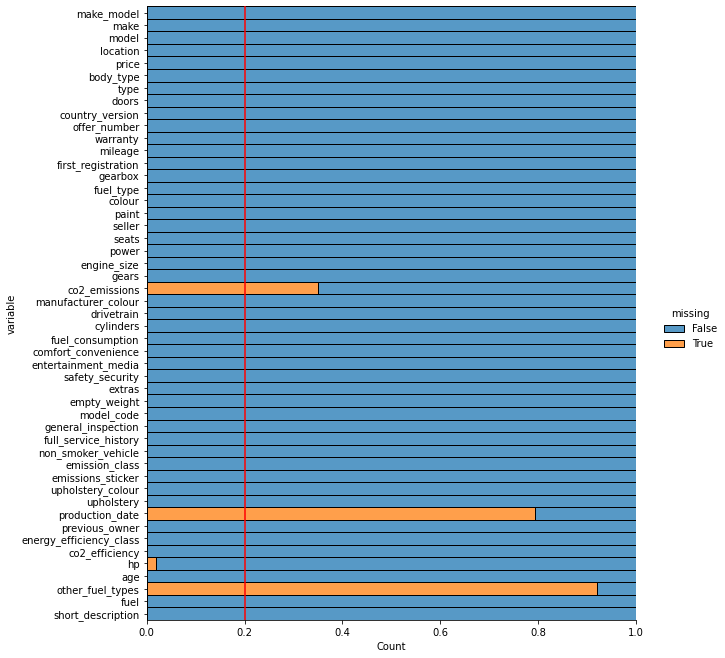

In [8]:
show_nulls(df)

In [9]:
# DROP COLUMNS IF IT HAS MORE THAN 20 percent nans
# calculate the percentage of NaN values in each column
def drop_columns_nan(dataframe, percentage = 50):
    nan_percent = dataframe.isna().sum() / len(dataframe) * 100

    # get the column names with more than percentage% NaN values
    cols_to_drop = nan_percent[nan_percent > percentage].index.tolist()

    # drop the columns with more than percentage% NaN values
    return dataframe.drop(cols_to_drop, axis=1)

# DROP
df = drop_columns_nan(df,20)
df = df.drop(['offer_number', 'fuel_consumption', 'location', 'short_description', 'first_registration', 'fuel_type'], axis=1)
# df = df.drop(['fuel_consumption_city','fuel_consumption_country'], axis=1)
df = df.drop(['power'], axis=1)

In [10]:
df.to_csv('after_drop.csv',index=False)

<Figure size 720x360 with 0 Axes>

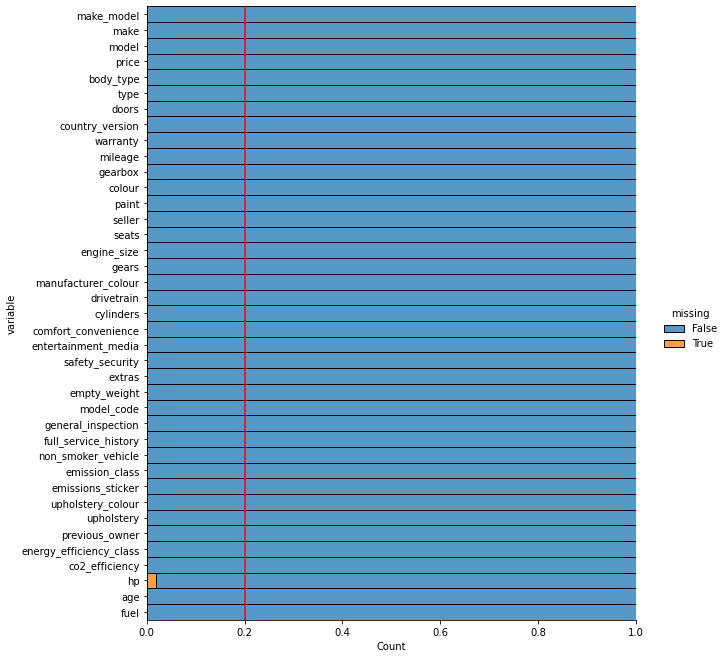

In [11]:
show_nulls(df)

In [28]:
for i in df.columns:
    print(i, df[i].nunique())

make_model 611
make 13
model 594
price 5021
body_type 6
type 4
doors 7
country_version 26
warranty 66
mileage 14112
gearbox 4
colour 15
paint 3
seller 2
seats 12
engine_size 468
gears 12
manufacturer_colour 4964
drivetrain 4
cylinders 13
comfort_convenience 14439
entertainment_media 1945
safety_security 12550
extras 9361
empty_weight 1219
model_code 2187
general_inspection 92
full_service_history 2
non_smoker_vehicle 2
emission_class 10
emissions_sticker 5
upholstery_colour 12
upholstery 7
previous_owner 11734
energy_efficiency_class 11
co2_efficiency 2
hp 567
age 85
fuel 7


In [12]:
def fillwith(col):
    print(df[col].isna().value_counts())
    df[col] = df.groupby(['make_model', 'body_type','age','hp'])[col].transform(lambda x: x.fillna(x.mean()))
    df[col] = df.groupby(['make_model', 'body_type','age','fuel'])[col].transform(lambda x: x.fillna(x.mean()))
    df[col] = df.groupby(['make_model', 'body_type','fuel'])[col].transform(lambda x: x.fillna(x.mean()))
    df[col] = df.groupby(['make_model', 'body_type'])[col].transform(lambda x: x.fillna(x.mean()))
    df[col] = df.groupby(['make_model'])[col].transform(lambda x: x.fillna(x.mean()))
    df[col] = df.groupby(['make'])[col].transform(lambda x: x.fillna(x.mean()))
    print('after')
    print(df[col].isna().value_counts())

In [13]:
def fillwithMode(col):
    print(df[col].isna().value_counts())
    df[col] = df.groupby(['make_model', 'body_type','age','fuel'])[col].transform(lambda x: x.fillna(x.mode()[0]) if not x.mode().empty else np.nan)
    df[col] = df.groupby(['make_model', 'body_type','fuel'])[col].transform(lambda x: x.fillna(x.mode()[0]) if not x.mode().empty else np.nan)
    df[col] = df.groupby(['make_model', 'body_type'])[col].transform(lambda x: x.fillna(x.mode()[0]) if not x.mode().empty else np.nan)
    df[col] = df.groupby(['make_model'])[col].transform(lambda x: x.fillna(x.mode()[0]) if not x.mode().empty else np.nan)
    print('after')
    print(df[col].isna().value_counts())

In [14]:
for col in df.columns:
    if df[col].isna().sum() > 0:
        print(col)
        if df[col].dtype == 'object':
            fillwithMode(col)
        else:
            fillwith(col)

mileage
False    28629
True         1
Name: mileage, dtype: int64
after
False    28630
Name: mileage, dtype: int64
hp
False    28054
True       576
Name: hp, dtype: int64
after
False    28630
Name: hp, dtype: int64
age
False    28628
True         2
Name: age, dtype: int64
after
False    28630
Name: age, dtype: int64


In [15]:
df.fillna(method='ffill', inplace=True)
df.fillna(method='bfill', inplace=True)

In [16]:
df.isna().value_counts()

make_model  make   model  price  body_type  type   doors  country_version  warranty  mileage  gearbox  colour  paint  seller  seats  engine_size  gears  manufacturer_colour  drivetrain  cylinders  comfort_convenience  entertainment_media  safety_security  extras  empty_weight  model_code  general_inspection  full_service_history  non_smoker_vehicle  emission_class  emissions_sticker  upholstery_colour  upholstery  previous_owner  energy_efficiency_class  co2_efficiency  hp     age    fuel 
False       False  False  False  False      False  False  False            False     False    False    False   False  False   False  False        False  False                False       False      False                False                False            False   False         False       False               False                 False               False           False              False              False       False           False                    False           False  False  False    28630
d

In [17]:
df.to_csv('after_part2.csv',index=False)